<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-daniela-estevez/blob/main/Semana_7_Data_Analysis_with_Python_(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Python

**Nombre 1:** Daniela Estevez Rodriguez

**Matricula 1:** A01793723
<br>
<br>

**Materia:** Ciencia y analítica de datos

**Profesor:** Victoria Guerrero Orozco

**Fecha:** 1 de Noviembre de 2022

## Module 4 - Model Development

In [1]:
#Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Import dataframe from last module
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

#convierte los datos a un dataframe
df=pd.read_csv(url,header=None)

# Coloca nombres a columnas
headers = ["symboling", "normalized-losses","make", "fuel-type", "aspiration", "num-of-doors","body-style",
           "drive-wheels", "engine-location", "wheel-base", "length", "width", "height","curb-weight", "engine-type",
           "num-of-cylinders", "engine-size","fuel-system", "bore", "stroke","compression-ratio", "horsepower","peak-rpm", 
           "city-mpg", "highway-mpg", "price"]

df.columns=headers

In [3]:
#Cambia columnas objeto a numericas
col=("normalized-losses", "bore", "stroke", "horsepower","peak-rpm", "price")

for c in col:
  #coverts ? to missing value
  df[c] = df[c].replace('?', np.nan)
  #change data-type
  df[c]=df[c].astype("float64")

In [4]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)
# reset index, because we droped some rows
df.reset_index(drop=True, inplace=True)

In [5]:
#Replace missing values with mean
mean=df["normalized-losses"].mean()
df["normalized-losses"].replace(np.nan,mean)

avg_norm_loss = df["normalized-losses"].mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore=df['bore'].mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_str=df['stroke'].mean(axis=0)
df["stroke"].replace(np.nan, avg_str, inplace=True)

avg_horsepower = df['horsepower'].mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [6]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [7]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
# Crea variable indicadora
pd.get_dummies(df["fuel-type"],drop_first=True)

,gas
0,1
1,1
2,1
3,1
4,1
...,...
196,1
197,1
198,1
199,0


### Model Development

- Model. math equation used to predict a value given one or more values.
- Important to have RELEVANT infomation

### Linear Regression and Multiple Linear Regression

- Simple Linear Regresision-one independent varaible to make a prediction
- Multiple Linear Regresision-more than one independent varaible to make a prediction

FOR SIMPLE LINEAR REGRESION

> Independent variable (predictor) - x

> Dependente variable (target) - y

> b0=intercept

> b1=slop

y=b0 +b1x



In [9]:
# Create the model object
lm1=LinearRegression()

# Extract pridictor and target
x=df[["highway-mpg"]]
y=df[["price"]]

# Train the model to get b0 and b1
lm1.fit(x,y)

LinearRegression()

In [10]:
# Make prediction
yhat1=lm1.predict(x)

In [11]:
# View the intercept b0
lm1.intercept_

array([38423.30585816])

In [12]:
# View the slope b1
lm1.coef_

array([[-821.73337832]])

The Relationship between Price and Highway MPG is given by 

> Price = 38423.31 - 831.73 * highway-mpg

FOR MULTIPLE LINEAR REGRESION

> Independent variables (predictors) - x1, x2, ... , xn

> Dependente variable (target) - y

> b0=intercept

> b1, b2, ..., bn=coeficients for x1, x2, ... , xn

y=b0 +b1x1 + b2x2 + ... + bnxn

In [13]:
# Extract pridictors
X=df[["horsepower","curb-weight","engine-size","highway-mpg"]]

# Create the model object
lm2=LinearRegression()

# Train the model
lm2.fit(X, y)

# Make prediction
yhat2=lm2.predict(X)

In [14]:
# View the intercept b0
lm2.intercept_

array([-15824.03820823])

In [15]:
# View the slope b1
lm2.coef_

array([[53.61042729,  4.70886444, 81.47225667, 36.39637823]])

The Relationship between Price and the predictors is given by

> Price = 15806.62 + 53.50xhorsepower + 4.71xweight + 81.53xengine-size + 36.06xhighway-mpg


### Model Evaluation using Visualization

(0.0, 48176.91097022766)

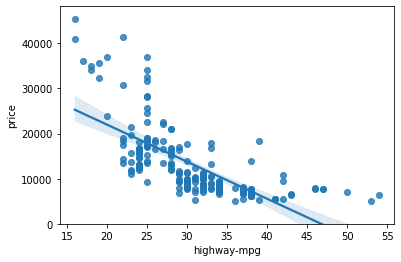

In [16]:
# Regression plot
sns. regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

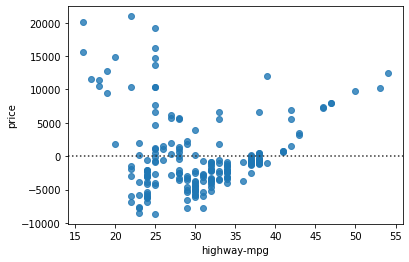

In [17]:
# Residual plot

sns.residplot(x="highway-mpg", y="price", data=df)
plt.show()

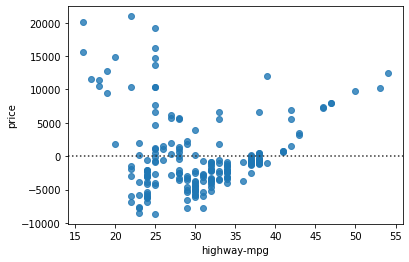

In [18]:
# Residual plot (poniendo directo los subpltos)

sns.residplot(x=x, y=y)
plt.show()

- Pueden ayudar a determinar si es apropiado un modelo lineal y si la varianza es constante.
- En este caso no hay un patron que sugiera una relación diferente a lineal. 
- Además se observa que los datos se mantiene en una franja entre -1000 y 15000, por tanto la varianza es constante.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


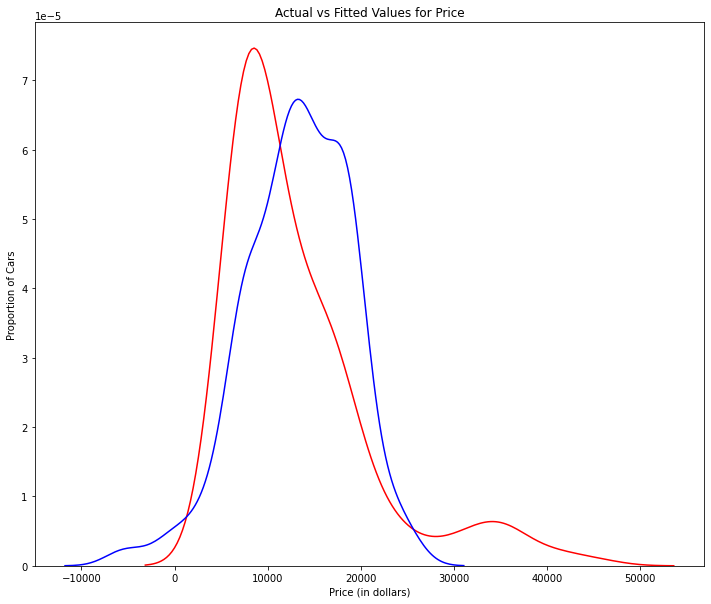

In [19]:
# Distribution plots (FUNCTION WILL BE REMOVED)
plt.figure(figsize=(12,10))

ax1=sns.distplot(df["price"],hist=False,color="r",label="Actual Values")
sns.distplot(yhat1,hist=False,color="b",label="Fitted Values",ax=ax1);

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

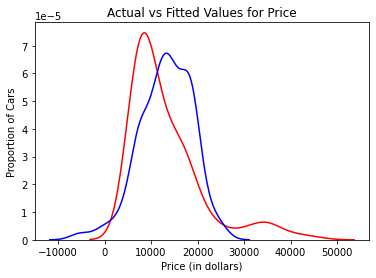

In [20]:
# Distribution plots (NEW FUNCTION)
ax1=sns.kdeplot(df["price"],multiple="layer",color="r",label="Actual Values")
sns.kdeplot(yhat1.reshape(-1),multiple="layer",color="b",label="Fitted Values",ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars');

- Vemos que entre en 15000 y 25000 le cuesta mas al modelo predecir adecuadamente

### Polynomial Regression and Pipelines

- pipiline to simplify your code
- polynomial  regression is beneficial to model curvilineal relationship

In [21]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [22]:
# Let's get the variables:
x = df['highway-mpg']
y = df['price']

In [23]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


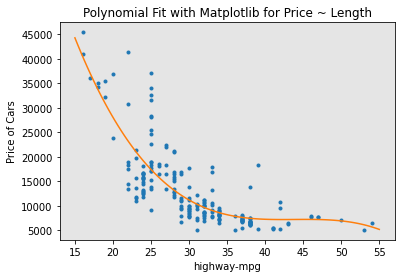

In [24]:
# Let's plot the function:
PlotPolly(p, x, y, 'highway-mpg')

In [25]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points

In [26]:
# We create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [27]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Z_pr=pr.fit_transform(Z)

In [28]:
# In the original data, there are 201 samples and 4 features
Z.shape

(201, 4)

In [29]:
# After the transformation, there are 201 samples and 15 features.
Z_pr.shape

(201, 15)

Pipline.

Steps: 1) Normalization -> Polynomial transformation -> Linear Regression

In [30]:
# Input for pipeline
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

# Pipeline objet
pipe=Pipeline(Input)

In [31]:
# Entrena el modelo
Z = Z.astype(float) #Convierte variables a tipo float
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [32]:
# Hace predicción
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13103.37745014, 13103.37745014, 18228.50045451, 10392.95563313])

### Measures for In-Sample Evaluation

MSE - mean square error

R^2 value - Coeficiente de determinación

MODELO REGRESIÓN LINEAL SIMPLE

In [33]:
# Definimos datos
X = df[['highway-mpg']]
Y = df['price']

# Definimos objeto de regresion
lm = LinearRegression()

#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [34]:
# We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [35]:
# We can compare the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


MODELO REGRESIÓN LINEAL MULTIPLE

In [36]:
# Definimos datos
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8094130135602673


In [37]:
# We produce a prediction:
Y_predict_multifit = lm.predict(Z)

In [38]:
# We compare the predicted results with the actual results:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11976801.681229586


MODELO POLINOMIAL

In [39]:
# We apply the function to get the value of R^2:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [40]:
# We can also calculate the MSE:
mean_squared_error(df['price'], p(x))

20474146.426361218

### Prediction and Decision Making

In [41]:
# Create a new input:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [42]:
#Fit the model:
lm.fit(X, Y)
lm

LinearRegression()

In [43]:
#Produce a prediction:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

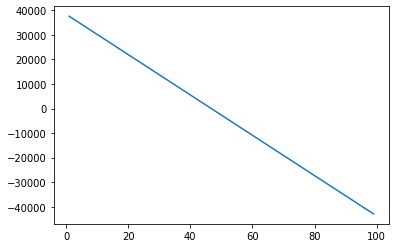

In [44]:
#We can plot the data:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Y ahora, ¿cómo terminamos si el modelo tiene buen ajuste?
<ul>
    <li><i>Cómo es un buen valor R-squared?</i></li>
</ul>
</p>

<p>Cuando comparas modelos, mientras mayor sea mejor</b>.
<ul>
    <li><i>Cómo es un buen MSE?</i></li>
</ul>
</p>

<p>Cuando comparas modelos, el mejor sera el que tenga el menor MSE.</p>

<h4>Comparemos los modelos.</h4>
<p>Regresión Lineal Simple: Con Highway-mpg como variable predictora de Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Regresión Lineal Multiple: Con Horsepower, Curb-weight, Engine-size, y Highway-mpg  como variables predictoras de Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Modelo Polinomial : Con Highway-mpg como variable predictora de Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Regresión Lineal Simple (RLS) vs. Modelo Polinomial (MP)</h3>


<ul>
    <li><b>MSE</b>: podemos ver que el MP redujo el MSE, ya que este MSE es más pequeño que el del RLS.</li>
    <li><b>R-cuadrado</b>: el R-cuadrado para MP es mayor que el R-cuadrado para RLS, por lo que MP también aumentó bastante el R-cuadrado.</ li>
</ul>
<p>Dado que el ajuste polinomial resultó en un MSE más bajo y un R-cuadrado más alto, podemos concluir que este fue un modelo de mejor ajuste que la regresión lineal simple para predecir el "Price" con "Highway-mpg" como variable de predicción. </p>

<h3>Regresión Lineal Multiple (RLM) vs. Modelo Polinomial (MP)</h3>


<ul>
    <li><b>MSE</b>: el MSE para el MLR es más pequeño que el MSE para el MP.</li>
    <li><b>R-cuadrado</b>: el R-cuadrado para el MLR también es mucho mayor que para el MP.</li>
</ul>

<h2>Conclusión</h2>


<p>Al comparar estos tres modelos, concluimos que <b>el modelo MLR es el mejor modelo</b> para poder predecir el precio a partir de nuestro conjunto de datos. Este resultado tiene sentido ya que tenemos 27 variables en total y sabemos que más de una de esas variables son predictores potenciales del precio final del automóvil.</p>

### Lab

In [45]:
#Question #1 a):
#Create a linear regression object called "lm1".

lm1 = LinearRegression()
lm1

LinearRegression()

In [46]:
# Question #1 b):
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [47]:
# Question #1 c):
# Find the slope and intercept of the model.

# Slope 
print(lm1.coef_)

# Intercept
print(lm1.intercept_)

[[166.86001569]]
[-7963.33890628]


In [48]:
# Question #1 d):
# What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

In [49]:
# Question #2 a):
# Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", 
# and the predictor variable is "normalized-losses" and "highway-mpg".

# Write your code below and press Shift+Enter to execute 
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [50]:
# Question #2 b):
# Find the coefficient of the model.

# Write your code below and press Shift+Enter to execute 
lm2.coef_

array([   1.49789586, -820.45434016])

In [51]:
# Question #3:
# Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

# Write your code below and press Shift+Enter to execute 
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058605,-0.101542
highway-mpg,-0.058605,1.000000,-0.704692
price,-0.101542,-0.704692,1.000000


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


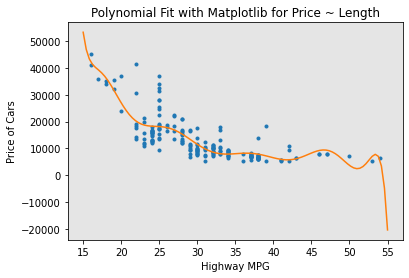

In [52]:
# Question #4:
# Create 11 order polynomial model with the variables x and y from above.

# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [53]:
#Question #5:
#Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.00138847, 13699.00138847, 19055.18075089, 10621.20889105,
       15519.94133137, 13868.36830279, 15455.25561838, 15973.23070656,
       17613.77045652, 10722.84396625])

### Evidencias

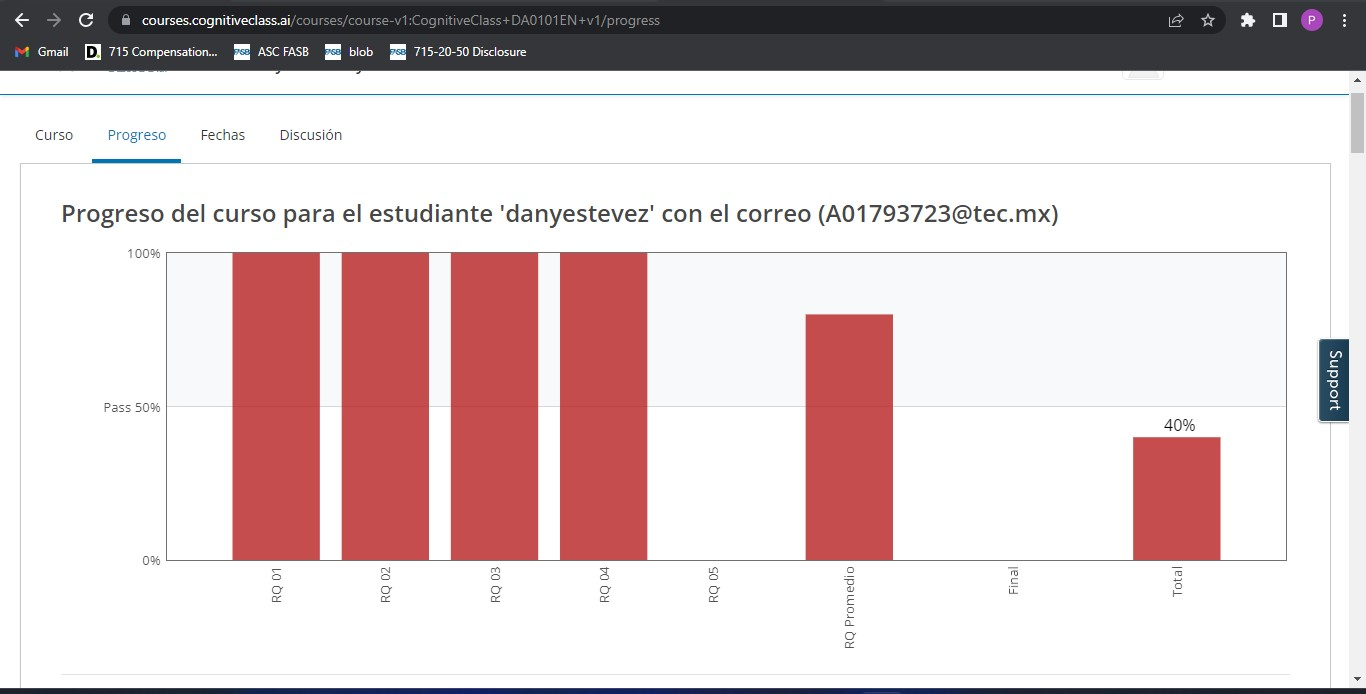